# Multi-class Softmax

In [ ]:
from autograd import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
datapath = '../mlrefined_datasets/superlearn_datasets/'

# imports from custom library
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer();
plotter = superlearn.multi_outupt_plotters

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## Task 1: Define model

In [2]:
def model(x,w):
    #to do : define the model
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

## Task 2: Implement multiclass softmax

In [16]:
# multiclass softmax regularized by the summad length of all normal vectors
lam = 10**(-5)  # our regularization parameter 
def multiclass_softmax(w):        
    # to do: compute predictions 
    all_evals = model(x,w)
    
    # to do: compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # to do: compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # to do: add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

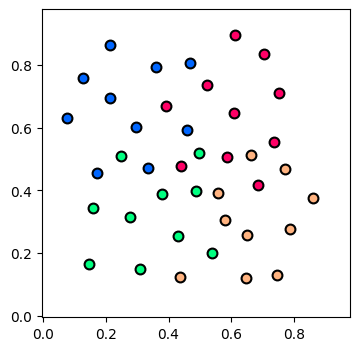

In [17]:
f

# load in dataset
data = np.loadtxt(datapath + '4class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

demo = superlearn.multiclass_illustrator.Visualizer(data)

# visualize dataset
demo.show_dataset()

# optimization 
g = multiclass_softmax; w = 0.1*np.random.randn(3,4); max_its = 5; 
weight_history,cost_history = optimizers.newtons_method(g,max_its,w)

## Here we plot our results

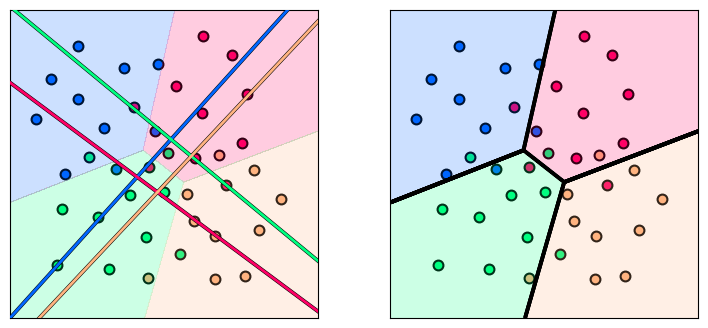

In [18]:
# plot classification of space, individual learned classifiers  and joint boundary
demo.show_complete_coloring(weight_history, cost = multiclass_softmax)